In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [6]:
start = pd.read_csv('C:/Users/sharu/Downloads/multi regression/50_Startups.csv')

In [7]:
start.head()

,R&Dspend,Administration,MarketingSpend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
start.tail()

,R&Dspend,Administration,MarketingSpend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [9]:
start.isnull()

,R&Dspend,Administration,MarketingSpend,State,Profit
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
6,False,False,False,False,False
7,False,False,False,False,False
8,False,False,False,False,False
9,False,False,False,False,False


In [10]:
start.dtypes

R&Dspend          float64
Administration    float64
MarketingSpend    float64
State              object
Profit            float64
dtype: object

In [12]:
start[start.duplicated()].shape

(0, 5)

In [16]:
startup=start.rename({'R&Dspend' : 'RNDs', 'Administration' : 'Admin', 'MarketingSpend' : 'MS', }, axis=1)

In [17]:
startup.head()

,RNDs,Admin,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Transformations
##Dummy Variable



In [20]:
startup_dummi=pd.get_dummies(startup,columns=['State'])

In [44]:
startup_dummi.head()

,RNDs,Admin,MS,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [23]:
startup_dummi.corr()

,RNDs,Admin,MS,Profit,State_California,State_Florida,State_New York
RNDs,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Admin,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
MS,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


In [28]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~MS+Admin+RNDs',data=startup_dummi).fit()

In [32]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [30]:
#Coefficients
model.params

Intercept    50122.192990
MS               0.027228
Admin           -0.026816
RNDs             0.805715
dtype: float64

In [31]:
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
MS            1.655077
Admin        -0.525507
RNDs         17.846374
dtype: float64 
 Intercept    1.057379e-09
MS           1.047168e-01
Admin        6.017551e-01
RNDs         2.634968e-22
dtype: float64


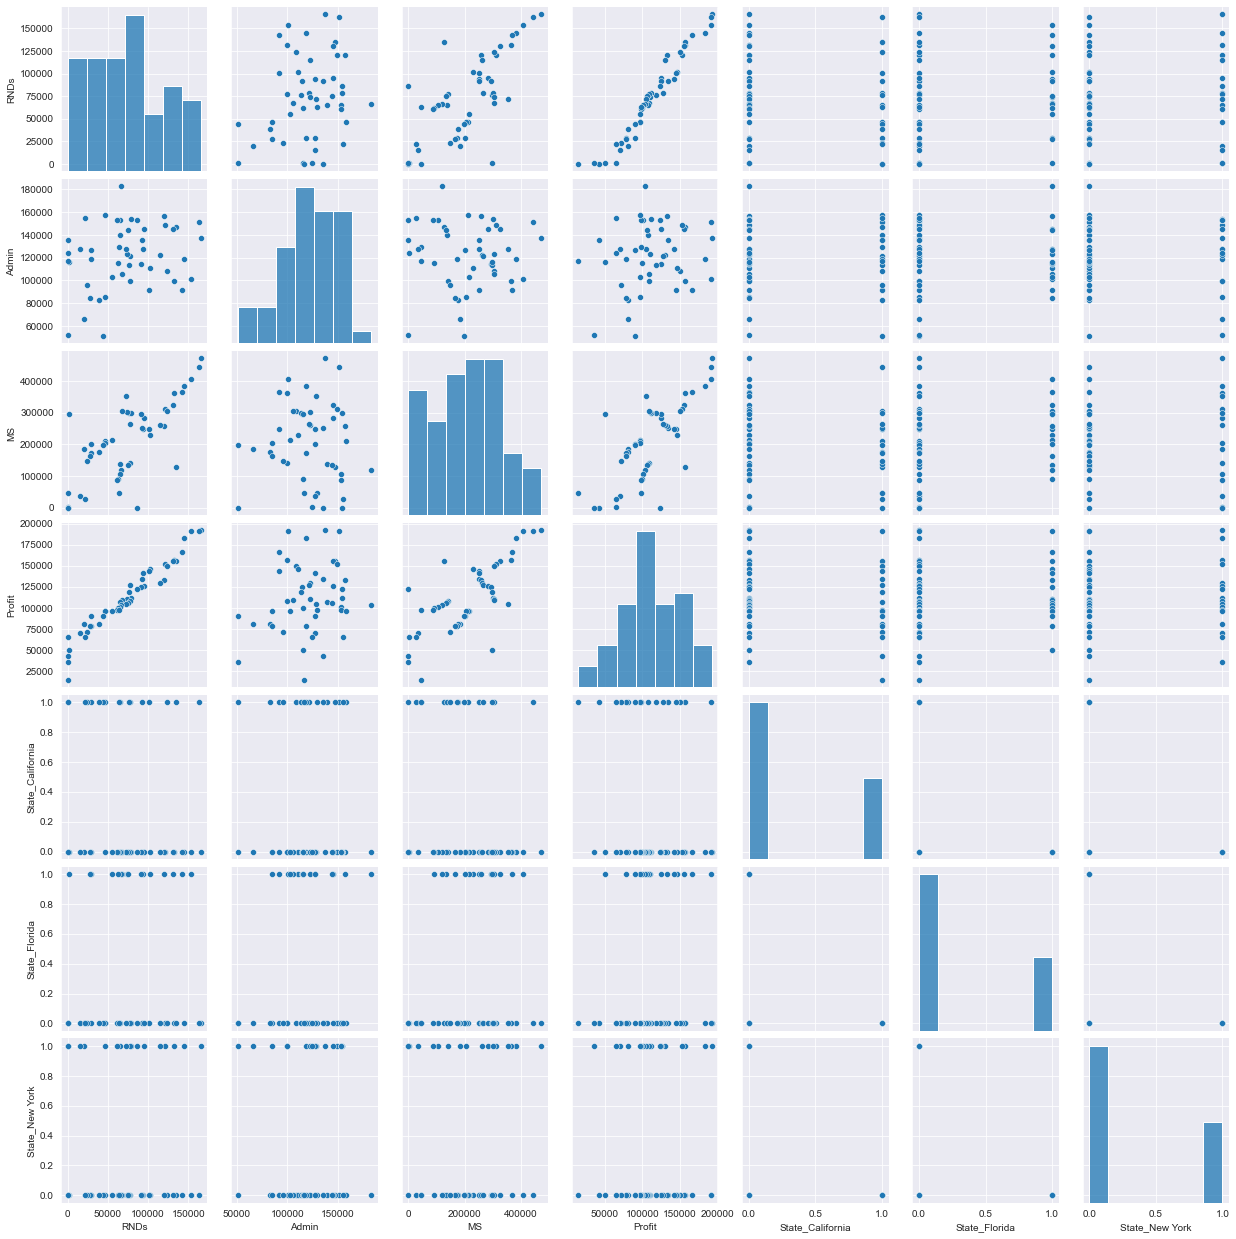

In [34]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_dummi)

C:\Users\sharu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='RNDs', ylabel='Density'>

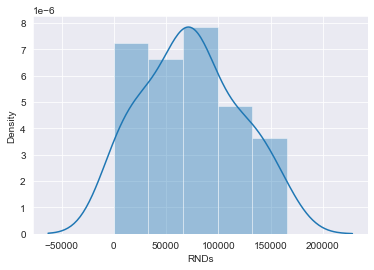

In [37]:
sns.distplot(startup_dummi['RNDs'])

C:\Users\sharu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MS', ylabel='Density'>

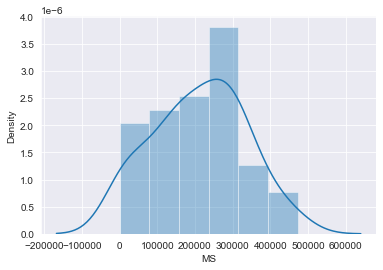

In [38]:
sns.distplot(startup_dummi['MS'])

C:\Users\sharu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Admin', ylabel='Density'>

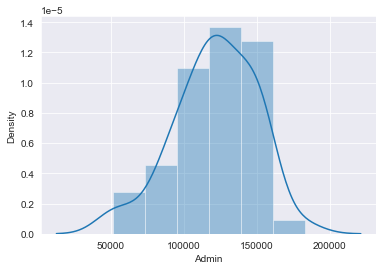

In [39]:
sns.distplot(startup_dummi['Admin'])

C:\Users\sharu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Profit', ylabel='Density'>

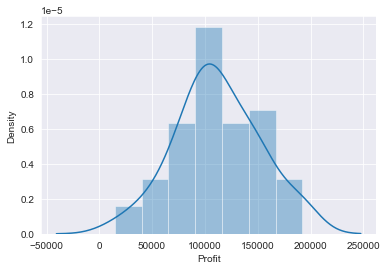

In [40]:
sns.distplot(startup_dummi['Profit'])

In [42]:
startup_dummi.isna().sum()

RNDs                0
Admin               0
MS                  0
Profit              0
State_California    0
State_Florida       0
State_New York      0
dtype: int64

In [106]:
a = startup_dummi.drop('Profit' ,axis=1)
b = startup_dummi[['Profit']]

In [92]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size = 0.2, random_state = 0)

In [96]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(a_train, b_train)

LinearRegression()

In [97]:
# Predicting the Test set results
Predicting = regressor.predict(a_test)

In [102]:
from sklearn.metrics import r2_score
R2value=r2_score(b_test,Predicting)

In [103]:
R2value

0.9347068473282424